In [35]:
# source : https://www.dataquest.io/blog/jupyter-notebook-tutorial/
# Lets do some EDA and cleaning first

import pandas as pd;
import matplotlib.pyplot as plt;
%matplotlib inline

In [36]:
df = pd.read_csv(r"C:\Users\farooq_fox\Desktop\Tableau and jupyter\fortune500.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
Year                     25500 non-null int64
Rank                     25500 non-null int64
Company                  25500 non-null object
Revenue (in millions)    25500 non-null float64
Profit (in millions)     25500 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [37]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [38]:
# Renaming columns for easy access

df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [39]:
# Profit must be numeric but here its object, so there must be some alphabet entries, lets check 

non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [40]:
# There are non numbers as expected, lets count them 

len(df.profit[non_numberic_profits])

369

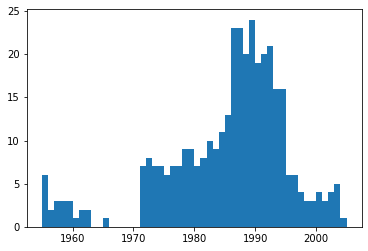

In [41]:
# 369 / 25500  is like 1.5 % of our set, these can be omitted if they are evenly distributed.  

bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [66]:
# They are not really even but just ignore them. Remove them and make profit number type

df_cleaned = df.loc[~non_numberic_profits] # ~ is negation 
df_cleaned.profit = df_cleaned.profit.apply(pd.to_numeric)

In [43]:
# checking if the rows have been dropped 

print(len(df))
print(len(df_cleaned))

25500
25131


In [44]:
# Number of unique companies. Some companies have been dropped as a part of cleaning

print(df['company'].nunique())
print(df_cleaned['company'].nunique()) 
#27  companies have been dropped
# I want to print them. 

1887
1860


In [45]:
# Number of years for which data has been recorded. 

df_cleaned.year.nunique()

51

In [46]:
df_cleaned.describe()

,year,rank,revenue,profit
count,25131.000000,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780,207.903677
std,14.764827,144.443000,11396.723687,1173.695947
min,1955.000000,1.000000,49.700000,-98696.000000
25%,1967.000000,124.000000,357.900000,8.900000
50%,1980.000000,250.000000,1017.600000,35.500000
75%,1993.000000,375.000000,3916.100000,150.500000
max,2005.000000,500.000000,288189.000000,25330.000000


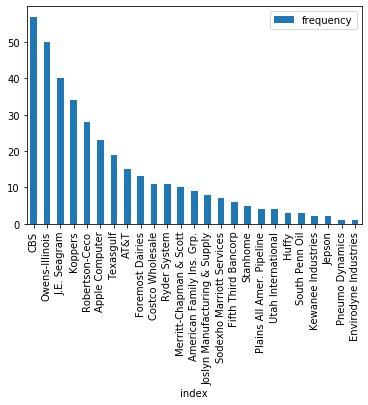

In [55]:
# Im planning to see which company is repeated most no. of times. 
# That would be a graph with Company vs frequency of occurence 


#df2 = df_cleaned.groupby('company').size().to_frame('frequency')
#df_cleaned.groupby('company')[['company']].count().rename(columns = {'company':'frequency'})
df2 = df_cleaned['company'].value_counts().reset_index(name='frequency')

# plotting every 50th value from sorted dataframe
df2.iloc[::75].plot.bar(x='index', y='frequency')
plt.show()

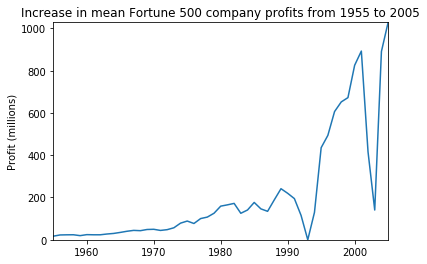

In [67]:
# all rows but only 3 columns, grouped by year 
group_by_year = df_cleaned.loc[:, ['year', 'revenue', 'profit']].groupby('year')

# average rev and profit of each year
avgs = group_by_year.mean()

#x stores index in this case all the years and y has mean profit 
x = avgs.index
y1 = avgs.profit

# Lets plot with a function 
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

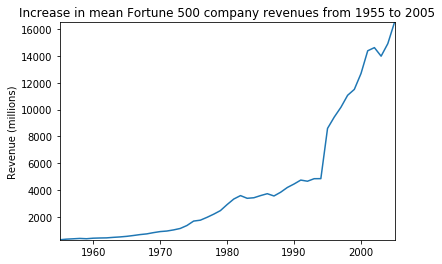

In [49]:
# So there was a dip in profits during 2008 recession 
# lEts check revenue 

y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

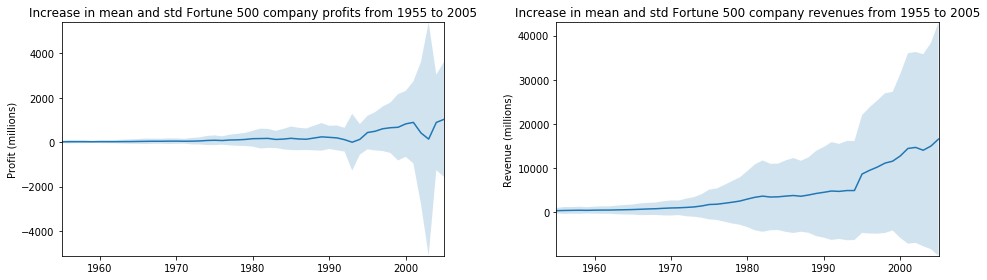

In [50]:
# The revenues didnt take much hit 

# define a plot with 1 std deviation from mean 
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    
    
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()